## This notebook will show the initial finidings of time-series analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/interim/filtered_dataset.csv")


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# print head of df
print(df.head())

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  351626f25a540a0fccbe42fb815b14ae6c75c15676bf7c...              NaN   
1  f798e1cdba8adfb80ee2aaeea541a55dd32fa8aff38494...                Y   
2  0ad333cd371ec3976f9fac8160ccfc91f0399b48a92b7f...              NaN   
3  dfb3229940c672426c4010d7348d16b69b030191213b86...                Y   
4  821ee3270b2c503fd0905415f674d3f4a63e1ac15d9100...              NaN   

   CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  2018-01-01                  30            NO CONTROLS   
1  2018-01-01                  20            NO CONTROLS   
2  2018-01-01                  25            NO CONTROLS   
3  2018-01-01                  30            NO CONTROLS   
4  2018-01-01                  35            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0           NO CONTROLS             CLEAR                 UNKNOWN   
1           NO CONTROLS             CLEAR                DAYLI

In [ ]:
# Check for missing data: Look at difference in time between records and plot d/t

# Create new df to look at time differences (and only including certain columns)
columns_to_keep = [ # selected columns to keep for analysis
    "CRASH_DATETIME", "CRASH_DATE", "CRASH_TIME", "CRASH_DAY_OF_WEEK", "Day_Of_Year",
    "Hour_Of_Day", "Hour_Of_Week", "LATITUDE", "LONGITUDE",
    "WEATHER_CONDITION", "LIGHTING_CONDITION"
]
# Create a new DataFrame with selected columns
df_time_diff = df[columns_to_keep].copy()

# Compute the time difference (Δt) between consecutive crashes in minutes
df_time_diff['CRASH_DATETIME'] = pd.to_datetime(df_time_diff['CRASH_DATETIME'])
df_time_diff['Time_Difference'] = df_time_diff['CRASH_DATETIME'].diff().dt.total_seconds() / 60  # Convert to minutes

# Drop the first row since the first time difference is NaN
df_time_diff = df_time_diff.dropna()

# Reset index for clarity
df_time_diff = df_time_diff.reset_index(drop=True)

# print the first few rows of the new DataFrame
print(df_time_diff.head())

       CRASH_DATETIME  CRASH_DATE CRASH_TIME  CRASH_DAY_OF_WEEK  Day_Of_Year  \
0 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
1 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
2 2018-01-01 00:05:00  2018-01-01   00:05:00                  1            1   
3 2018-01-01 00:07:00  2018-01-01   00:07:00                  1            1   
4 2018-01-01 00:20:00  2018-01-01   00:20:00                  1            1   

   Hour_Of_Day  Hour_Of_Week   LATITUDE  LONGITUDE WEATHER_CONDITION  \
0            0             0  41.800575 -87.589225             CLEAR   
1            0             0  41.681735 -87.641014           UNKNOWN   
2            0             0  41.949417 -87.668774             CLEAR   
3            0             0  41.683946 -87.622993              SNOW   
4            0             0  41.985479 -87.659979              SNOW   

       LIGHTING_CONDITION  Time_Difference  
0                DAYLIGHT              0.

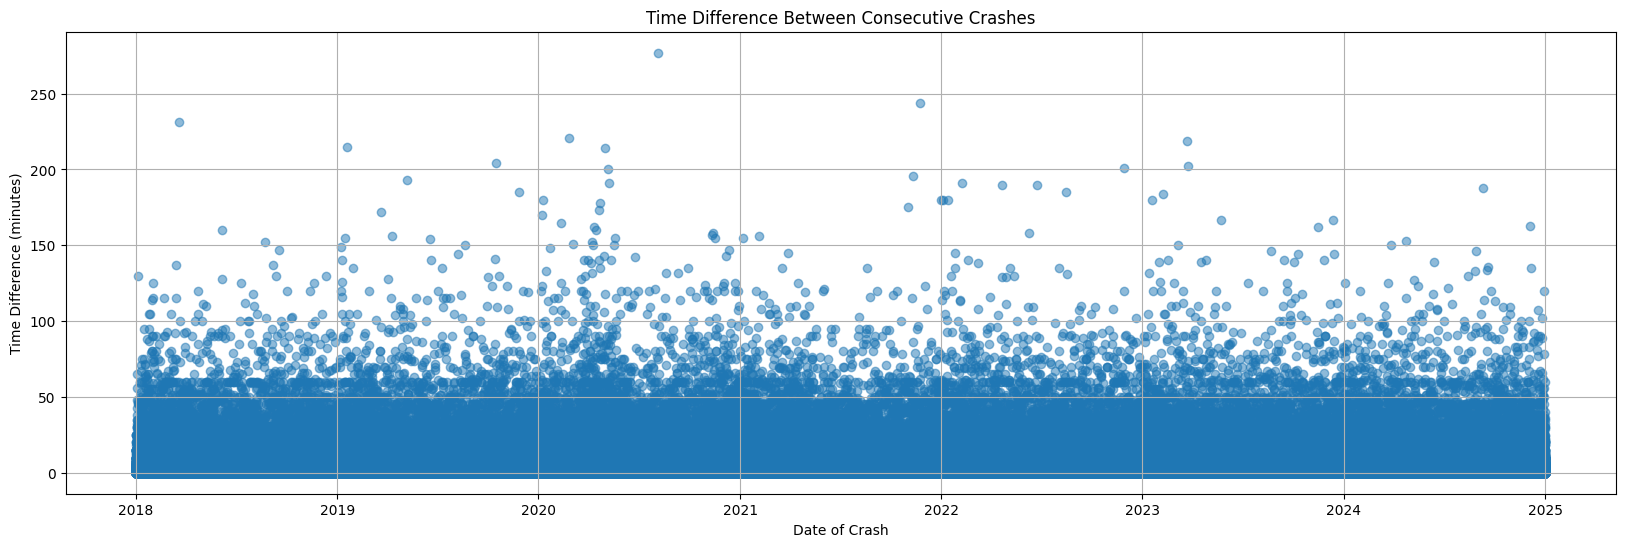

In [ ]:
# plot the time differences as a scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(df_time_diff['CRASH_DATETIME'], df_time_diff['Time_Difference'], alpha=0.5)
plt.title('Time Difference Between Consecutive Crashes')
plt.xlabel('Date of Crash')
plt.ylabel('Time Difference (minutes)')
plt.grid()


We can't see gaps of data in the scatterplot because there's too many data points. We need to query the dataframe directly.

In [ ]:
# Return top 50 maximum time differences
print(df_time_diff['Time_Difference'].nlargest(50)) #in minutes


287935    277.0
424268    244.0
24037     231.0
251132    221.0
564161    219.0
123246    215.0
263872    214.0
211318    204.0
564710    202.0
532823    201.0
264935    200.0
420593    196.0
157571    193.0
265103    191.0
444921    191.0
464600    190.0
484548    190.0
728558    188.0
224531    185.0
500424    185.0
551930    184.0
237619    180.0
434522    180.0
435476    180.0
437667    180.0
546227    180.0
262232    178.0
417920    175.0
261954    173.0
142385    172.0
237078    170.0
583514    167.0
646320    167.0
246490    165.0
754845    163.0
260822    162.0
638455    162.0
49347     160.0
261196    160.0
315584    158.0
479901    158.0
314875    157.0
148645    156.0
334675    156.0
122384    155.0
267287    155.0
316532    155.0
327887    155.0
171812    154.0
683537    153.0
Name: Time_Difference, dtype: float64


The maximum time between any crash is only a couple of hours. There are no large gaps in the data.

In [ ]:
# Check for errors in data: are there 0s?
print(df_time_diff[df_time_diff['Time_Difference'] == 0])

Let's begin a time-series analysis on this data.

In [ ]:
# Ensure CRASH_DATE is in datetime format (if not already)
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Aggregate total crashes per day
df_crashes_per_day = df.groupby("CRASH_DATE").size().reset_index(name="Total_Crashes")

# Display the first few rows
print(df_crashes_per_day.head())

  CRASH_DATE  Total_Crashes
0 2018-01-01            337
1 2018-01-02            452
2 2018-01-03            383
3 2018-01-04            360
4 2018-01-05            373


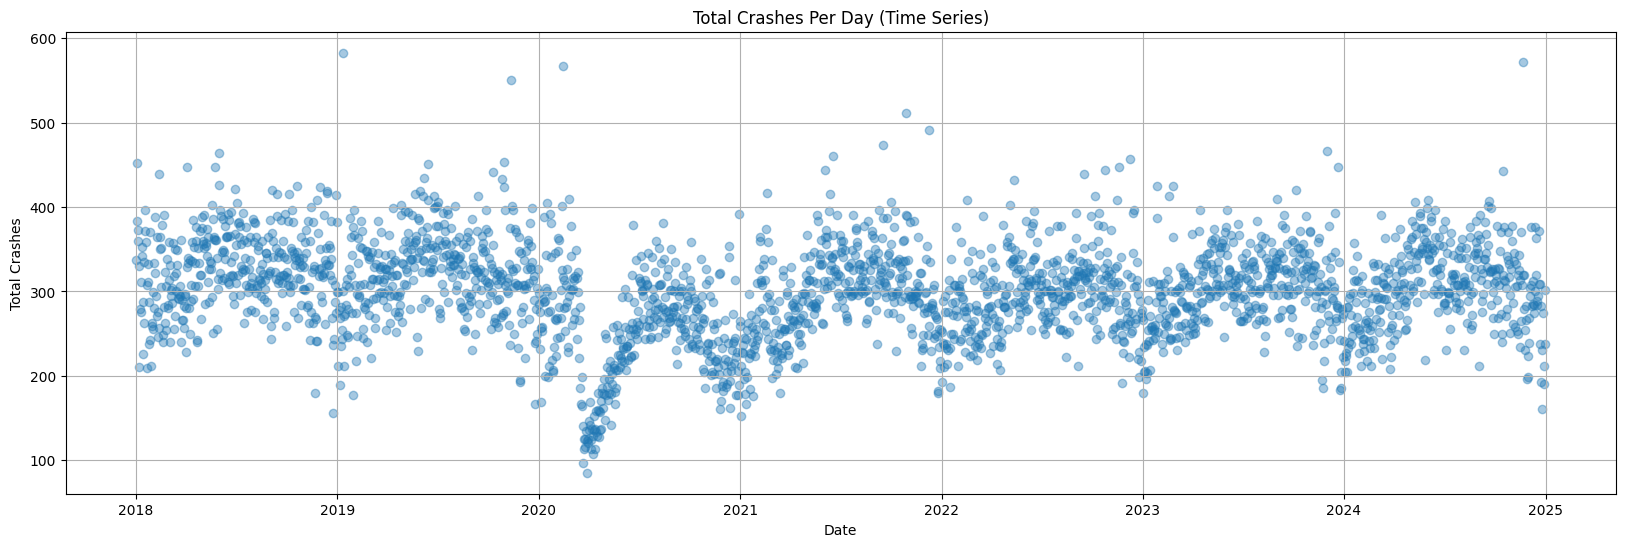

In [12]:
# Plot total crashes per day
plt.figure(figsize=(20, 6))
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.4)
plt.xlabel("Date")
plt.ylabel("Total Crashes")
plt.title("Total Crashes Per Day (Time Series)")
plt.grid(True)
plt.show()

Wow! There is a lot of noise, but there appears to be an upside-down U pattern that happens on a yearly basis. 
We can also see the huge dip in crashes that happened at the beginning of 2020. Could be sinusoidal? 